# New Section

In [0]:
# Some useful packages
import csv
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
from sklearn.model_selection import train_test_split # to split off training and test sets
from sklearn import preprocessing  # for standardizing the data
from sklearn import metrics  # Useful for creating confusion matrices
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf    # for creating neural networks
from tensorflow import keras   # an easier interface to work with than tensorflow


# Some useful functions we'll be needing later
Dense = keras.layers.Dense
Activation = keras.layers.Activation
to_categorical = keras.utils.to_categorical
Sequential = keras.Sequential

# The warnings generated can be a nuisance, so we'll turn them off.
import warnings  
warnings.filterwarnings('ignore')

# This loads in the dataset we'll be using for this assignment.
# https://drive.google.com/open?id=1gRWbC-rdBfxHyVcG-uCrAgJYJvHERJZO
file_id = 'nflscrapR-data/master/legacy_data/season_team_stats/team_def_season_passing_df.csv'
link = 'https://raw.githubusercontent.com/ryurko/{FILE_ID}'
csv_url = link.format(FILE_ID = file_id)

# Import the file as a Pandas data frame.
data = pd.read_csv(csv_url, error_bad_lines=False)

# What are the dimensions of this dataset?
print('data.shape =', data.shape)

data.info()

columns = data.columns
#print(columns)

data.shape = (289, 91)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 91 columns):
Season                       289 non-null int64
Team                         288 non-null object
Player_Name                  289 non-null object
Attempts                     289 non-null int64
Completions                  289 non-null int64
Drives                       289 non-null int64
Comp_Perc                    289 non-null float64
Total_Yards                  289 non-null int64
Total_Raw_AirYards           289 non-null int64
Total_Comp_AirYards          289 non-null float64
Yards_per_Att                289 non-null float64
Yards_per_Comp               289 non-null float64
Yards_per_Drive              289 non-null float64
Raw_AirYards_per_Att         289 non-null float64
Comp_AirYards_per_Att        289 non-null float64
Raw_AirYards_per_Comp        289 non-null float64
Comp_AirYards_per_Comp       289 non-null float64
Raw_AirYards_per_Drive       289 non

In [0]:
import os,csv
from os import listdir
from os.path import isfile, join
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
from sklearn.model_selection import train_test_split # to split off training and test sets
from sklearn import preprocessing  # for standardizing the data
from sklearn import metrics  # Useful for creating confusion matrices
import pandas as pd        # reading in data files, data cleaning
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf    # for creating neural networks
from tensorflow import keras   # an easier interface to work with than tensorflo

# Some useful functions we'll be needing later
Dense = keras.layers.Dense
Activation = keras.layers.Activation
to_categorical = keras.utils.to_categorical
Sequential = keras.Sequential


teams_csv = "/2018_teams.csv"
games_csv = "/2018_games.csv"

def create_team(columns, data):
    team = {}
    i = 0
    for column in data:
        column_title = str(columns[i])
        if i == 0:
            team[column_title] = column.lower()
        elif column_title == "division":
            team[column_title] = str(column).split(",")
        else:
            team[column_title] = float(column)
        i+=1
    team["schedule"] = []
    return team

def write_team(data, name):
    with open(name + ".pickle", 'w') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def open_all_teams():
    teams = {}
    for team in listdir("teams"):
        if ".pickle" in team:
            with open("teams/" + team, 'rb') as handle:
                data = pickle.load(handle)
                teams[data["team"]] = data
    return teams

def initialize_teams():
    with open(teams_csv) as teams:
        readCSV = csv.reader(teams, delimiter=',')
        columns = next(readCSV)
        database = {}
        for row in readCSV:
            team = create_team(columns, row)
            database[team["team"]] = team
        return database


def process_season(database):
    with open(games_csv) as games:
        readCSV = csv.reader(games, delimiter=',')
        columns = next(readCSV)
        for row in readCSV:
            w_dict = {"opponent":row[3].lower(),"home":True if int(row[2]) == 1 else False,"win":True,"points_for":float(row[4]),"points_allowed":float(row[5]),"yards_for":float(row[6]),"yards_allowed":float(row[8]),"turnovers_per_game":float(row[7]), "turnover_caused":float(row[9]), "penalty_yds":float(row[10])}
            l_dict = {"opponent":row[1].lower(),"home":False if int(row[2]) == 1 else True,"win":False,"points_for":float(row[5]),"points_allowed":float(row[4]),"yards_for":float(row[8]),"yards_allowed":float(row[6]),"turnovers_per_game":float(row[9]), "turnover_caused":float(row[7]), "penalty_tds":float(row[11])}
            database[row[1].lower()]["schedule"].append(w_dict)
            database[row[3].lower()]["schedule"].append(l_dict)
            
def process_season_whole():
    with open(games_csv) as games:
        readCSV = csv.reader(games, delimiter=',')
        columns = next(readCSV)
        database = []
        for row in readCSV:
            w_dict = {"winner_points_for":float(row[4]),"loser_points_for":float(row[5]),"winner_yards_for":float(row[6]),"winner":row[1].lower(),"loser":row[3].lower(),"loser_yards_for":float(row[8]), "winner_turnovers":float(row[7]), "loser_turnovers":float(row[9]), "winner_penalty_yds":float(row[10]), "loser_penalty_yds":float(row[11])}
            database.append(w_dict)
        return database
      
# database = initialize_teams()
# process_season(database)
data = pd.DataFrame.from_dict(process_season_whole())
data.info()
# raiders_schedule = pd.DataFrame.from_dict(data["rams"]["schedule"])
# corrmat = raiders_schedule.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=0.8, square=True)
# sns.set()
# columns = ["points_allowed","points_for","yards_allowed","yards_for"]
# sns.pairplot(raiders_schedule[columns], kind='scatter', diag_kind='kde')
# plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 10 columns):
loser                 256 non-null object
loser_penalty_yds     256 non-null float64
loser_points_for      256 non-null float64
loser_turnovers       256 non-null float64
loser_yards_for       256 non-null float64
winner                256 non-null object
winner_penalty_yds    256 non-null float64
winner_points_for     256 non-null float64
winner_turnovers      256 non-null float64
winner_yards_for      256 non-null float64
dtypes: float64(8), object(2)
memory usage: 20.1+ KB


In [0]:
data['winner_points_for'].describe()

count    256.000000
mean      28.890625
std        8.592048
min        6.000000
25%       23.000000
50%       27.000000
75%       34.000000
max       54.000000
Name: winner_points_for, dtype: float64

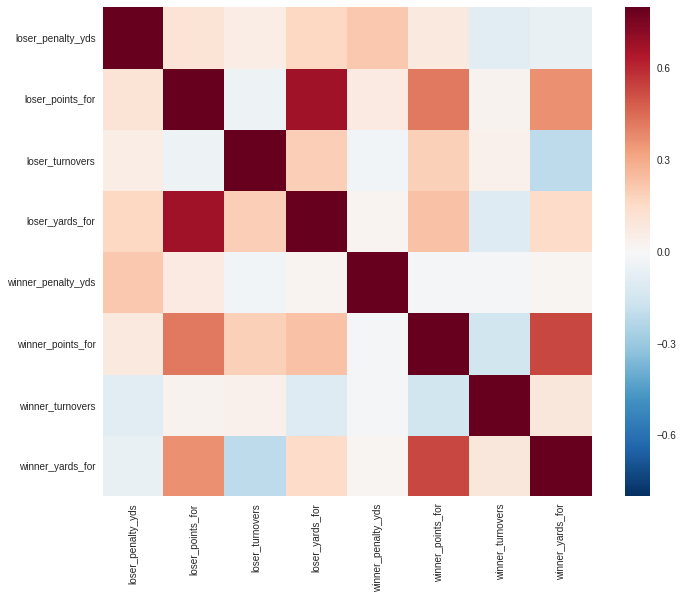

In [0]:
# Correlation Matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [0]:
data = data.drop(columns=['winner'])
data = data.drop(columns=['loser'])

In [0]:
#Isolating winner_points_for from the rest of the columns
one = data.columns.tolist()[0:5]
two = data.columns.tolist()[6:]
#three = data.columns.tolist()[2:5]
cols = one + two + three
X = data[cols]
y = data['winner_points_for', 'loser_points_for']  

# This library will help us randomly split our data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

KeyError: ignored

In [0]:
# X holds the data we'll use to predict the labels y.
X_train.head()

,loser_penalty_yds,loser_points_for,loser_turnovers,loser_yards_for,winner_penalty_yds,winner_turnovers,winner_yards_for
215,90.0,13.0,0.0,313.0,85.0,0.0,312.0
99,59.0,23.0,1.0,305.0,35.0,4.0,456.0
25,43.0,12.0,3.0,362.0,53.0,2.0,257.0
84,30.0,3.0,2.0,185.0,69.0,1.0,369.0
93,45.0,10.0,5.0,223.0,50.0,1.0,309.0


In [0]:
# y holds the corresponding labels.
y_train.head()

215    14.0
99     26.0
25     20.0
84     27.0
93     45.0
Name: winner_points_for, dtype: float64

**Oof**

In [0]:
from sklearn import linear_model

# This next line defines a linear model that still must be fit to our training data.
lm = linear_model.LinearRegression()
# Fitting our data to the model is now easy!
model = lm.fit(X_train, y_train)

# Let's examine this model.

# How well does our model predict the known labels in our training and test sets?
print('Training set R^2 =', lm.score(X_train, y_train))
print('Test set R^2 =', lm.score(X_test, y_test))

Training set R^2 = 0.505586774966349
Test set R^2 = 0.5082323610808437


In [0]:
# Step 1 - Save the old labels y_train in a temporary location.
temp = y_train.copy() 

# Step 2 - Copy the OverallQual column from X_train to y_train.
y_train = X_train['winner_yards_for'].copy()

# Step 3 - Drop the OverallQual column from X_train.
X_train = X_train.drop(columns=['winner_yards_for'])

# Step 4 - Make the old y_train a new SalePrice column in X_train.
X_train['winner_points_for'] = temp

In [0]:
# Step 1 - Save the old labels y_train in a temporary location.
temp = y_test.copy() 

# Step 2 - Copy the winner_yards_for column from X_train to y_train.
y_test = X_test['winner_yards_for'].copy()

# Step 3 - Drop the winner_yards_for column from X_train.
X_test = X_test.drop(columns=['winner_yards_for'])

# Step 4 - Make the old y_train a new winner_points_for column in X_train.
X_test['winner_points_for'] = temp

In [0]:
# Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression

LogisticRegression(solver='lbfgs')

# Step 2. Create an instance of the model
logisticRegr = LogisticRegression()

# Step 3. Train the model on the data
logisticRegr.fit(X_train, y_train)

# Step 4. Predict labels for the test data
predictions = logisticRegr.predict(X_test)

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
# Standardize the data.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 

# We also need to transform the test set, using the same means and standard deviations
# that were calculated from and used to transform the training set data.
X_test = scaler.transform(X_test) 

In [0]:
y_train -= -1   # subtract 1 from each entry in y_train
y_test -= 1

print('Now the lables are', set(y_train))

Now the lables are {513.0, 520.0, 522.0, 530.0, 535.0, 542.0, 552.0, 557.0, 566.0, 577.0, 176.0, 212.0, 217.0, 233.0, 234.0, 245.0, 246.0, 249.0, 258.0, 265.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 282.0, 284.0, 287.0, 289.0, 292.0, 293.0, 295.0, 296.0, 299.0, 302.0, 306.0, 309.0, 310.0, 313.0, 316.0, 317.0, 321.0, 322.0, 324.0, 326.0, 328.0, 331.0, 332.0, 333.0, 336.0, 339.0, 340.0, 341.0, 343.0, 344.0, 345.0, 347.0, 349.0, 352.0, 355.0, 360.0, 361.0, 362.0, 363.0, 366.0, 367.0, 369.0, 370.0, 371.0, 372.0, 374.0, 375.0, 376.0, 377.0, 378.0, 379.0, 380.0, 382.0, 385.0, 387.0, 388.0, 390.0, 396.0, 398.0, 403.0, 404.0, 405.0, 406.0, 408.0, 411.0, 412.0, 413.0, 414.0, 415.0, 417.0, 418.0, 419.0, 422.0, 424.0, 425.0, 427.0, 428.0, 430.0, 433.0, 434.0, 436.0, 437.0, 439.0, 443.0, 445.0, 447.0, 448.0, 450.0, 452.0, 456.0, 457.0, 458.0, 462.0, 463.0, 464.0, 465.0, 467.0, 469.0, 470.0, 471.0, 472.0, 473.0, 481.0, 484.0, 490.0, 492.0, 494.0, 499.0, 510.0}


In [0]:
# Standardize the data.
#scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 

# We also need to transform the test set, using the same means and standard deviations
# that were calculated from and used to transform the training set data.
X_test = scaler.transform(X_test) 

In [0]:
# One-hot encode the categorical labels.
train_hot_labels = to_categorical(y_train, num_classes = 600)
test_hot_labels = to_categorical(y_test, num_classes = 600)

In [0]:
# Instantiate a new neural network model
model = Sequential()

# Add some layers.
# Fist the input layer, which has 7 values, is connected to hidden layer 5, with 100 nodes (neurons).
model.add(Dense(1400, activation='sigmoid', input_dim = 7))
# Layer 2, hidden layer
model.add(Dense(900, activation='sigmoid'))
# Layer 3, output layer
model.add(Dense(600, activation = 'softmax', ))

# Compile the NN model, defining the optimizer to use, the loss function, and the metrics to use.
# These settings are appropriate for a multiple-class classification task.
model.compile(optimizer = 'rmsprop',     
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train, train_hot_labels, 
                    validation_split = 0.33, 
                    epochs = 200, 
                    batch_size = 32)

# Evaluate the model's performance
train_loss, train_acc = model.evaluate(X_train, train_hot_labels)
test_loss, test_acc = model.evaluate(X_test, test_hot_labels)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

Train on 136 samples, validate on 68 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
136/136 [==============================] - 1s 5ms/sample - loss: 7.0157 - acc: 0.0000e+00 - val_loss: 6.9675 - val_acc: 0.0147
Epoch 2/200
136/136 [==============================] - 0s 1ms/sample - loss: 5.1535 - acc: 0.0221 - val_loss: 7.1590 - val_acc: 0.0147
Epoch 3/200
136/136 [==============================] - 0s 1ms/sample - loss: 4.9558 - acc: 0.0147 - val_loss: 7.4442 - val_acc: 0.0000e+00
Epoch 4/200
136/136 [==============================] - 0s 1ms/sample - loss: 4.8396 - acc: 0.0147 - val_loss: 7.6946 - val_acc: 0.0000e+00
Epoch 5/200
136/136 [==============================] - 0s 1ms/sample - loss: 4.7760 - acc: 0.0294 - val_loss: 7.9118 - val_acc: 0.0147
Epoch 6/200
136/136 [==============================] - 0s 1ms/sample - loss: 4.7575 - acc: 0.0147 - val_loss: 8.0936 - val_acc: 0.0000e+00
Epoch 7/200
136/136 [==============================] - 0s 1ms/sample - loss: 4.73

**NEURAL NETWORK**

Using TensorFlow backend.


Train on 3076 samples, validate on 1516 samples
Epoch 1/10
3076/3076 [==============================] - 3s 998us/sample - loss: 0.8451 - acc: 0.5312 - val_loss: 1.1924 - val_acc: 0.5699
Epoch 2/10
3076/3076 [==============================] - 3s 967us/sample - loss: 0.7069 - acc: 0.5702 - val_loss: 0.6355 - val_acc: 0.6471
Epoch 3/10
3076/3076 [==============================] - 3s 988us/sample - loss: 0.6812 - acc: 0.6070 - val_loss: 0.7113 - val_acc: 0.5825
Epoch 4/10
3076/3076 [==============================] - 3s 1ms/sample - loss: 0.6729 - acc: 0.6053 - val_loss: 0.8091 - val_acc: 0.4558
Epoch 5/10
3076/3076 [==============================] - 3s 988us/sample - loss: 0.6543 - acc: 0.6196 - val_loss: 0.7369 - val_acc: 0.5152
Epoch 6/10
3076/3076 [==============================] - 3s 991us/sample - loss: 0.6538 - acc: 0.6362 - val_loss: 0.6305 - val_acc: 0.6484
Epoch 7/10
3076/3076 [==============================] - 3s 1ms/sample - loss: 0.6489 - acc: 0.6291 - val_loss: 0.9792 - val_ac

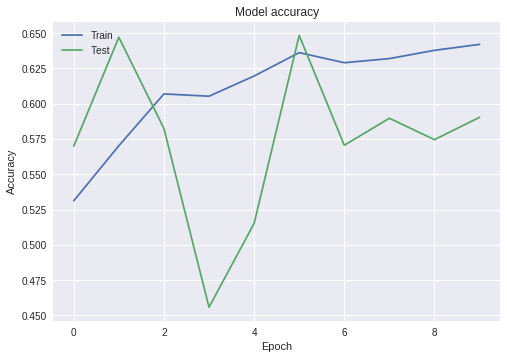

In [0]:
import pickle
import numpy as np         # linear algebra
import sklearn as sk       # machine learning
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing  # for standardizing the data
import pandas as pd
import seaborn as sns      # visualization tool
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # visualization tool
import tensorflow as tf    # for creating neural networks
from tensorflow import keras   # an easier interface to work with than tensorflow
import matplotlib.pyplot as plt
from keras.utils import plot_model

plot_model(model, to_file='model.png')

def openAllTeamsFromSeason(season):
    with open("/teams" + str(season) + ".pickle", 'rb') as handle:
        data = pickle.load(handle)
        return data

def openTeamFromSeason(team,season):
    with open("/teams" + str(season) + ".pickle", 'rb') as handle:
        data = pickle.load(handle)
        return data[team]

def openSeason(season):
    with open("/season" + str(season) + ".pickle", 'rb') as handle:
        data = pickle.load(handle)
        return data
      
def allStats(team):
    return list(team.values())
      
def getStat(team,stat):
    return float(team[stat])
      
def calculate(team):
    #['g', 'points', 'total_yards', 'plays_offense', 'yds_per_play_offense',
    #'turnovers', 'fumbles_lost', 'first_down', 'pass_cmp', 'pass_att', 'pass_yds',
    #'pass_td', 'pass_int', 'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds',
    # 'rush_td', 'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
    #'score_pct', 'turnover_pct', 'exp_pts_tot'])
    exp = float(team["exp_pts_tot"])
    return exp      

Dense = keras.layers.Dense
Activation = keras.layers.Activation
to_categorical = keras.utils.to_categorical
Sequential = keras.Sequential
# scrape.scrapeWeeklyResults()

full_table = []
x_train = []
y_train = []
x_test = []
y_test = []

for i in range(2000,2019):
    teams_for_year = openAllTeamsFromSeason(i)
    head_to_head = openSeason(i)
    for game in head_to_head:
        winner = teams_for_year[game[0]]
        loser = teams_for_year[game[1]]
        # w_value =
        # l_value =
        # print(winner["pass_net_yds_per_att"],loser["pass_net_yds_per_att"])
        if i <= 2017:
            if game[2] == 1:
                # AWAY WIN
                
                x_train.append([getStat(loser,"exp_pts_tot"),getStat(loser,"yds_per_play_offense"),getStat(winner,"exp_pts_tot"),getStat(winner,"yds_per_play_offense")])
                y_train.append(1)
            else:
                 x_train.append([getStat(winner,"exp_pts_tot"),getStat(winner,"yds_per_play_offense"),getStat(loser,"exp_pts_tot"),getStat(loser,"yds_per_play_offense")])
                 y_train.append(0)
        else:
            if game[2] == 1:
                #AWAY WIN
                 x_test.append([getStat(loser,"exp_pts_tot"),getStat(loser,"yds_per_play_offense"),getStat(winner,"exp_pts_tot"),getStat(winner,"yds_per_play_offense")])
                 y_test.append(1)
            else:
                 x_test.append([getStat(winner,"exp_pts_tot"),getStat(winner,"yds_per_play_offense"),getStat(loser,"exp_pts_tot"),getStat(loser,"yds_per_play_offense")])
                 y_test.append(0)
        # if game[2] == 1:
        #     # AWAY WIN
            # y_values.append(0)
        # else:

# Standardize the data.
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

# We also need to transform the test set, using the same means and standard deviations
# that were calculated from and used to transform the training set data.
x_test = scaler.transform(x_test)
train_hot_labels = to_categorical(y_train, num_classes = 600)
test_hot_labels = to_categorical(y_test, num_classes = 600)
# Instantiate a new neural network model
model = Sequential()

# Add some layers.
# Fist the input layer, which has 52 values, is connected to hidden layer 5, with 1400 nodes (neurons).
model.add(Dense(1400, activation='sigmoid', input_dim = 4))
# Layer 2, hidden layer
model.add(Dense(900, activation='sigmoid'))
# Layer 3, output layer
model.add(Dense(600, activation = 'softmax', ))

# Compile the NN model, defining the optimizer to use, the loss function, and the metrics to use.
# These settings are appropriate for a multiple-class classification task.
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
history = model.fit(x_train, train_hot_labels,
                    validation_split = 0.33,
                    epochs = 10,
                    batch_size = 32)



# Evaluate the model's performance
train_loss, train_acc = model.evaluate(x_train, train_hot_labels)
test_loss, test_acc = model.evaluate(x_test, test_hot_labels)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

      

# New Section